In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pywt
from PIL import Image  
import PIL  
from skimage.io import imsave, imread

In [ ]:
from dask import bag, diagnostics 
#import hvplot.pandas
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import shutil

import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, zero_one_loss, classification_report
import seaborn as sns
from tensorflow import keras
import matplotlib.cm as cm
from IPython.display import Image, display

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from keras.layers import Input
from keras.layers import Convolution2D , concatenate ,Conv2D,Dense
from keras.layers import Activation,Dropout, GlobalAveragePooling2D,MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam ,SGD,RMSprop

In [ ]:
import math
from keras.layers import MaxPool2D, concatenate, AveragePooling2D
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py
from keras.layers import Concatenate
import keras.backend as K
import keras
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imutils

In [ ]:
data_path = '/content/drive/MyDrive/Sem 2/CV/5G_Data/'

In [ ]:
classes = list(os.listdir('/content/drive/MyDrive/Sem 2/CV/5G_Data/'))
print(classes)

['4QAM', '64QAM', '16QAM', '32QAM', '8QAM']


In [ ]:
directories = {
    '4QAM': '/content/drive/MyDrive/Sem 2/CV/5G_Data/4QAM/',
    '8QAM': '/content/drive/MyDrive/Sem 2/CV/5G_Data/8QAM/',
    '16QAM': '/content/drive/MyDrive/Sem 2/CV/5G_Data/16QAM/',
    '32QAM': '/content/drive/MyDrive/Sem 2/CV/5G_Data/32QAM/',
    '64QAM': '/content/drive/MyDrive/Sem 2/CV/5G_Data/64QAM/',}

In [ ]:
# get image dimensions
def get_dims(file):
    img = cv2.imread(file)
    h,w = img.shape[:2]
    return h,w

[########################################] | 100% Completed | 14.22 s
[########################################] | 100% Completed | 11.27 s
[########################################] | 100% Completed | 8.13 s
[########################################] | 100% Completed | 10.08 s
[########################################] | 100% Completed | 11.76 s


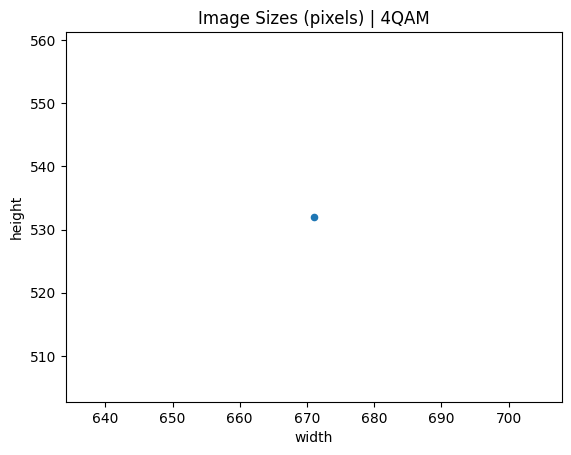

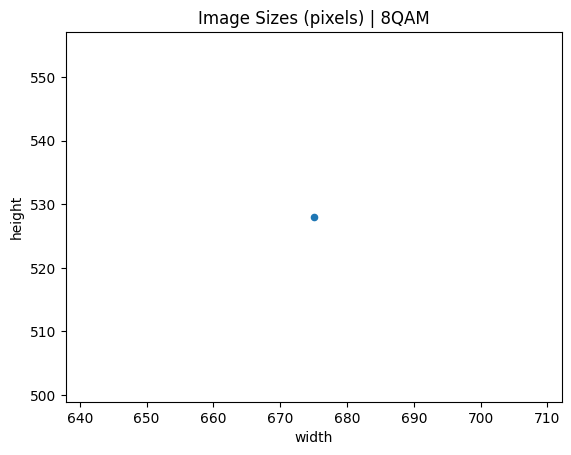

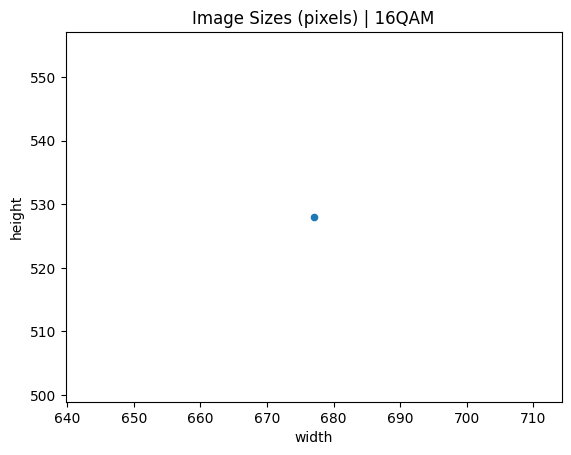

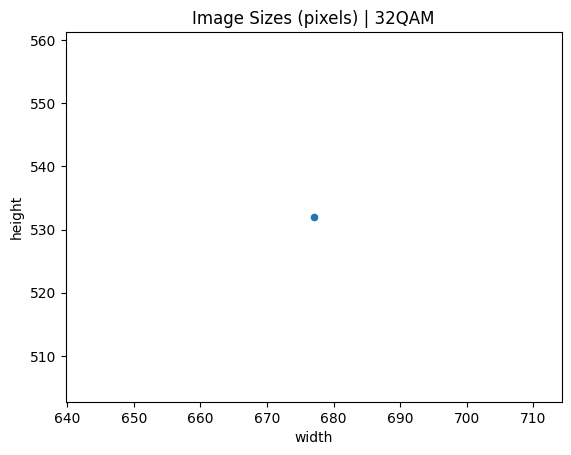

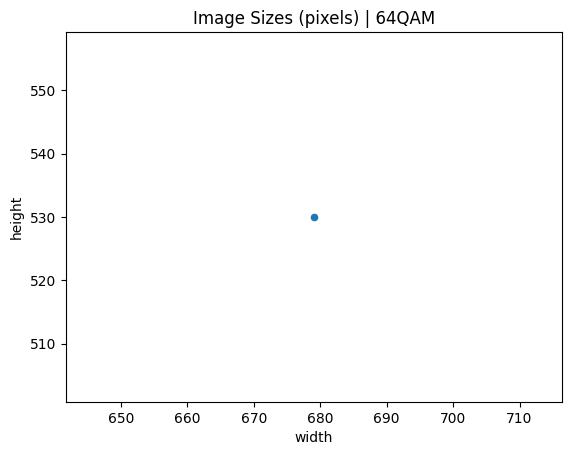

In [ ]:
for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = bag.from_sequence(filelist).map(get_dims)
  with diagnostics.ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

# **Scolograms**

In [ ]:
dir = directories['64QAM']
label = '64QAM'

def plot_samples(dir, label):
  from tensorflow.keras.preprocessing import image

  fig = plt.figure(figsize = (8,6))
  filelist = [filepath + f for f in os.listdir(dir)]
  files = np.random.choice(filelist, 6, replace = False)
  plt.title(label)
  plt.axis('off')

  for i in range(6):
      ax = fig.add_subplot(2, 3, i+1)
      fn = image.load_img(files[i], target_size = (100,100))
      plt.imshow(fn)
      plt.axis('off')
  plt.show()

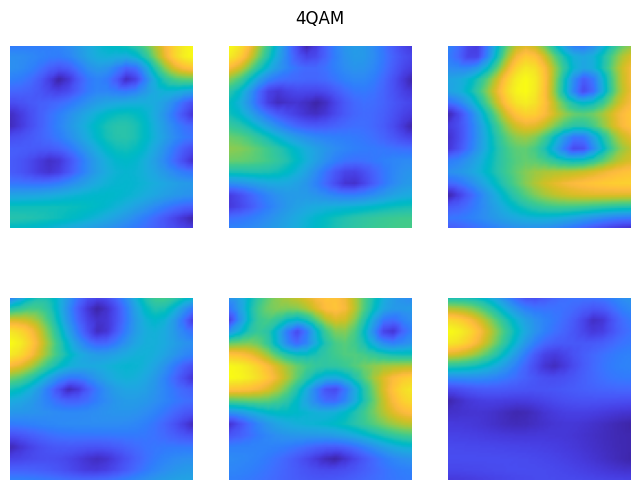

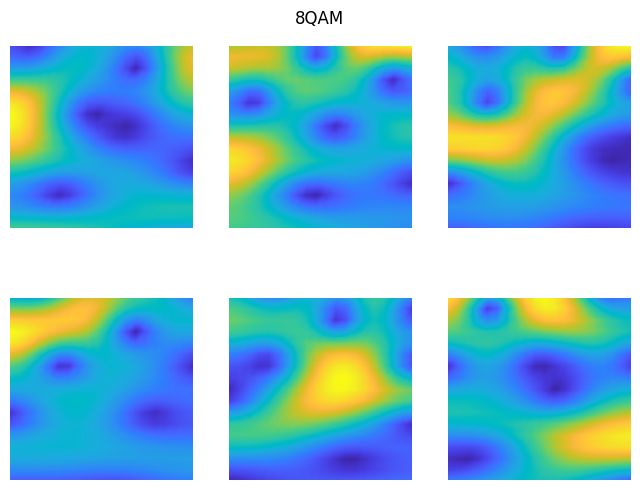

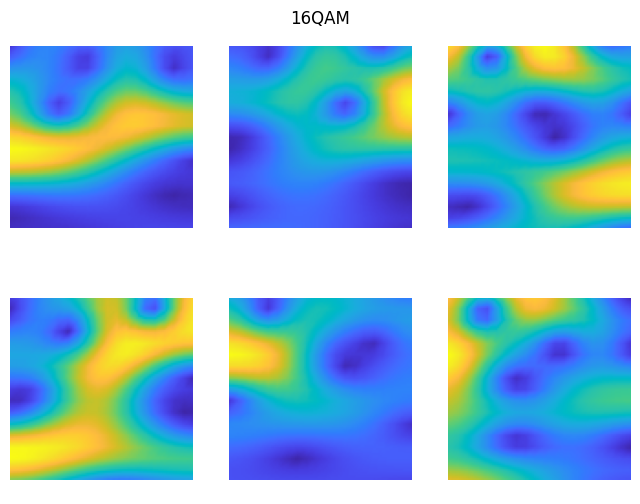

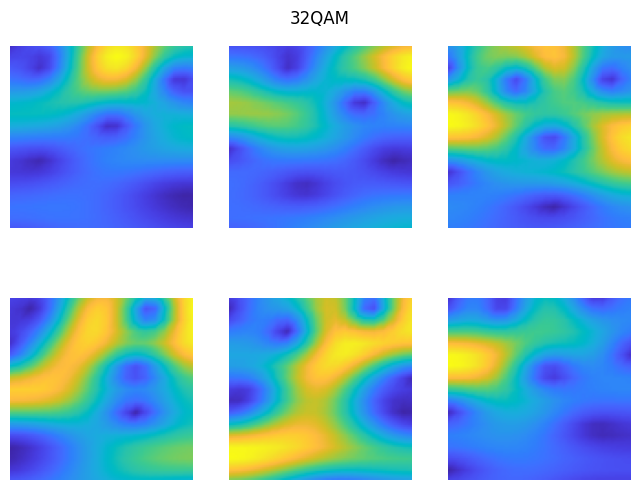

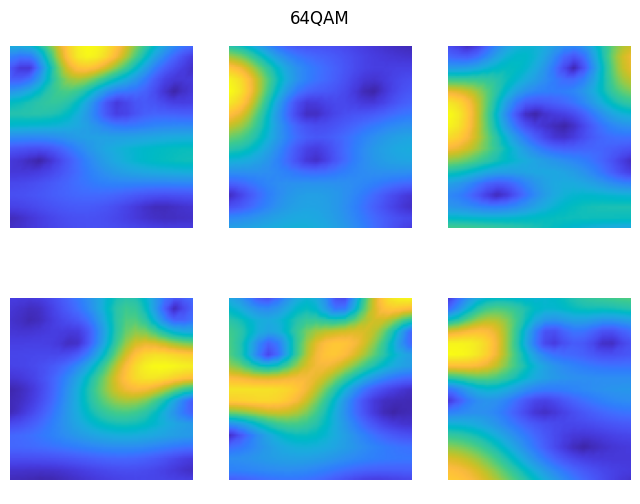

In [ ]:
for n,dir in directories.items():
  plot_samples(d,n)

# **Alexnet**

In [ ]:
#Model
def alexNet():
  alexnet_model = keras.models.Sequential([
      keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
      keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
      keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(4096, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(4096, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(2, activation='sigmoid')
  ])
  return alexnet_model

In [ ]:
IMG_SIZE = 227
BATCH_SIZE = 32

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    labels="inferred",
    label_mode="categorical",
    class_names= classes,
    #color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    labels="inferred",
    label_mode="categorical",
    class_names= classes,
    #color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False
)

Found 2002 files belonging to 5 classes.
Using 1602 files for training.
Found 2002 files belonging to 5 classes.
Using 400 files for validation.


In [ ]:
an_model = alexNet()

In [ ]:
#Compiling
an_model.compile(loss='categorical_crossentropy',
                 optimizer=tf.optimizers.SGD(lr=0.001),
                 metrics=['accuracy'])
an_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [ ]:
hist_an = an_model.fit(train_dataset,
          epochs=10,
          validation_data=val_dataset,
          validation_freq=1)

Epoch 1/10
7/7 [==============================] - 42s 6s/step - loss: 3.8816 - accuracy: 0.5862 - val_loss: 6.1207 - val_accuracy: 0.6400
Epoch 2/10
7/7 [==============================] - 39s 5s/step - loss: 1.0906 - accuracy: 0.7241 - val_loss: 6.8964 - val_accuracy: 0.6200
Epoch 3/10
7/7 [==============================] - 39s 5s/step - loss: 1.2430 - accuracy: 0.7094 - val_loss: 1.6881 - val_accuracy: 0.4000
Epoch 4/10
7/7 [==============================] - 39s 5s/step - loss: 0.9643 - accuracy: 0.7094 - val_loss: 2.7527 - val_accuracy: 0.6200
Epoch 5/10
7/7 [==============================] - 39s 5s/step - loss: 0.6094 - accuracy: 0.7685 - val_loss: 5.3212 - val_accuracy: 0.6200
Epoch 6/10
7/7 [==============================] - 39s 5s/step - loss: 0.7851 - accuracy: 0.7586 - val_loss: 1.5403 - val_accuracy: 0.3800
Epoch 7/10
7/7 [==============================] - 39s 5s/step - loss: 0.4694 - accuracy: 0.8177 - val_loss: 1.4429 - val_accuracy: 0.6200
Epoch 8/10
7/7 [==================

In [ ]:

an_model.evaluate(val_dataset)

2/2 [==============================] - 2s 737ms/step - loss: 1.2273 - accuracy: 0.6200


[1.227263331413269, 0.6200000047683716]

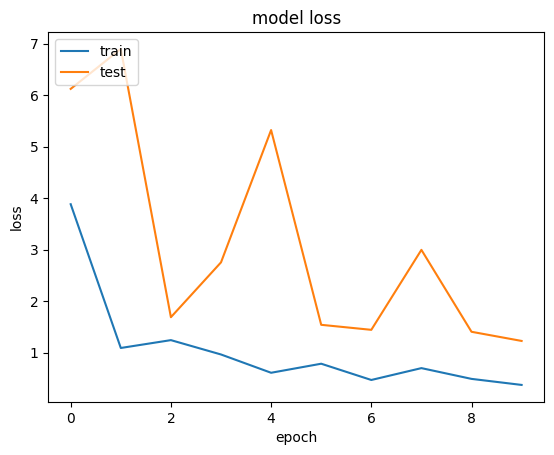

In [ ]:
# summarize history for loss
plt.plot(hist_an.history['loss'])
plt.plot(hist_an.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

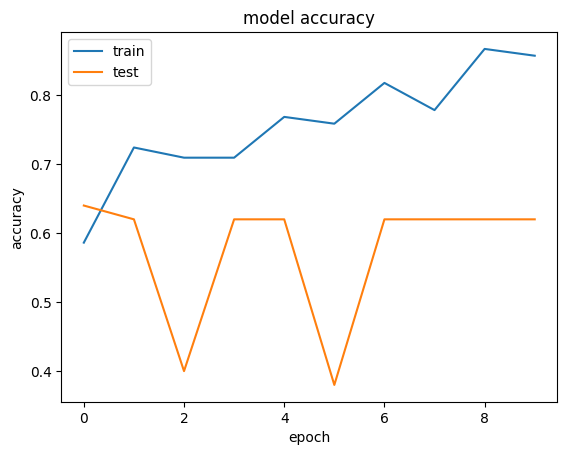

In [ ]:
# summarize history for accuracy
plt.plot(hist_an.history['accuracy'])
plt.plot(hist_an.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
data_augmentation = tf.keras.Sequential([
                            layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                            layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))
])

In [ ]:
resize_and_rescale = tf.keras.Sequential([
            layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE, input_shape=[IMG_SIZE,IMG_SIZE,3]),
            layers.experimental.preprocessing.Rescaling(1./255)
])
# resize_and_rescale = keras.Sequential([
#   layers.Resizing(IMG_SIZE, IMG_SIZE),
#   layers.Rescaling(1./255)
# ])